In [2]:
import tensorflow as tf

Loading MNIST

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Look at data at least once
--> show here an example data point

Text(0.5,1,'5')

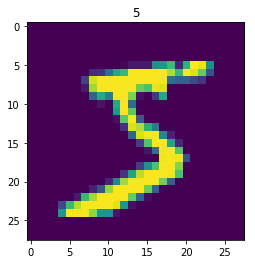

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0])
plt.title(y_train[0])

Create model

In [52]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),  
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
]) # Multilayer perceptron

Tell model how to optimize (`adam`) and which error function/loss to use (`sparse_categorical_crossentropy`).

Change adam to something else, check the documentation, what optimizers are commonly used? Write here a list

In [53]:
model.compile("adam", "sparse_categorical_crossentropy", metrics=['acc'])

Show the whole bunch of training data `10` times (--> `epochs`) to the model.

In [54]:
h = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 9s 152us/sample - loss: 0.2911 - acc: 0.9131
Epoch 2/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.1320 - acc: 0.9599
Epoch 3/10
60000/60000 [==============================] - 10s 172us/sample - loss: 0.0970 - acc: 0.9707
Epoch 4/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.0802 - acc: 0.9747
Epoch 5/10
60000/60000 [==============================] - 9s 152us/sample - loss: 0.0655 - acc: 0.9793
Epoch 6/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0560 - acc: 0.9816
Epoch 7/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0495 - acc: 0.9840s - loss: 0.0494 - acc: 0.98
Epoch 8/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.0402 - acc: 0.9872
Epoch 9/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.0387 - acc: 0.9868
Epoch 10/10
60000/60000 [===================

Plotting how the model learned.

In [30]:
import numpy as np

([<matplotlib.axis.XTick at 0x2192c5e8748>,
 <a list of 10 Text xticklabel objects>)

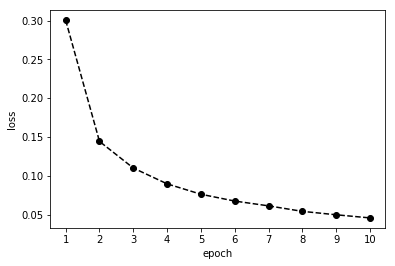

In [35]:
plt.plot(np.arange(10), h.history['loss'], 'ko--')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.xticks(np.arange(10), np.arange(10)+1)

Evaluate the model on previously unseen data

In [55]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 123us/sample - loss: 0.0898 - acc: 0.9772


[0.0898097074151614, 0.9772]

# MAGIC, around 98% accuracy!

CNN

In [46]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), input_shape=(28,28,1), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [47]:
cnn.compile("adam", "sparse_categorical_crossentropy", metrics=['acc'])

In [48]:
h2 = cnn.fit(x_train[..., None], y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.1718 - acc: 0.9466
Epoch 2/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.0551 - acc: 0.9828
Epoch 3/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0409 - acc: 0.9872
Epoch 4/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.0304 - acc: 0.9898
Epoch 5/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0254 - acc: 0.9918
Epoch 6/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.0210 - acc: 0.9932
Epoch 7/10
60000/60000 [==============================] - 9s 144us/sample - loss: 0.0174 - acc: 0.9945
Epoch 8/10
60000/60000 [==============================] - 9s 156us/sample - loss: 0.0165 - acc: 0.9946
Epoch 9/10
60000/60000 [==============================] - 9s 156us/sample - loss: 0.0149 - acc: 0.9948
Epoch 10/10
60000/60000 [==============================] - 10s 164us/samp

([<matplotlib.axis.XTick at 0x219272c8898>,
 <a list of 10 Text xticklabel objects>)

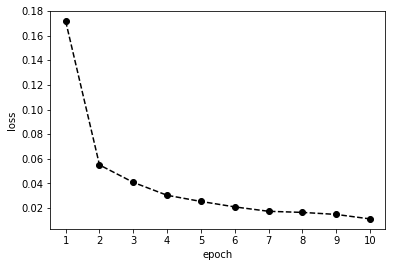

In [49]:
plt.plot(np.arange(10), h2.history['loss'], 'ko--')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.xticks(np.arange(10), np.arange(10)+1)

In [51]:
cnn.evaluate(x_test[..., None], y_test)

10000/10000 [==============================] - 1s 67us/sample - loss: 0.0316 - acc: 0.9924


[0.031559188796982565, 0.9924]

## 99.2%!